# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

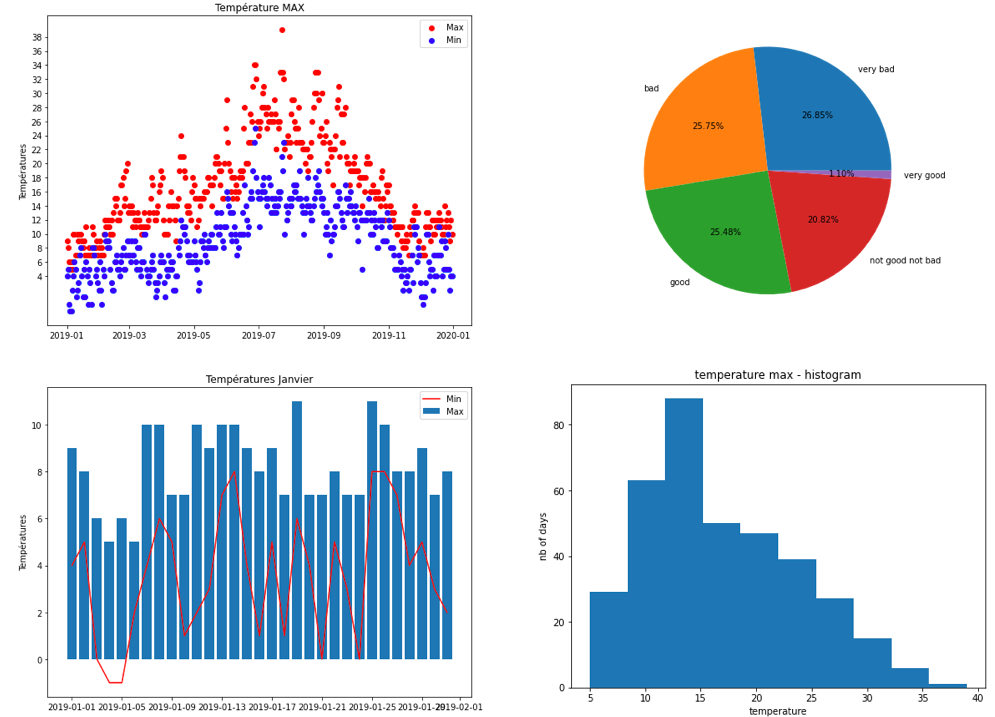

In [3]:
# Complete the code below :
opinion_value_counts = df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it

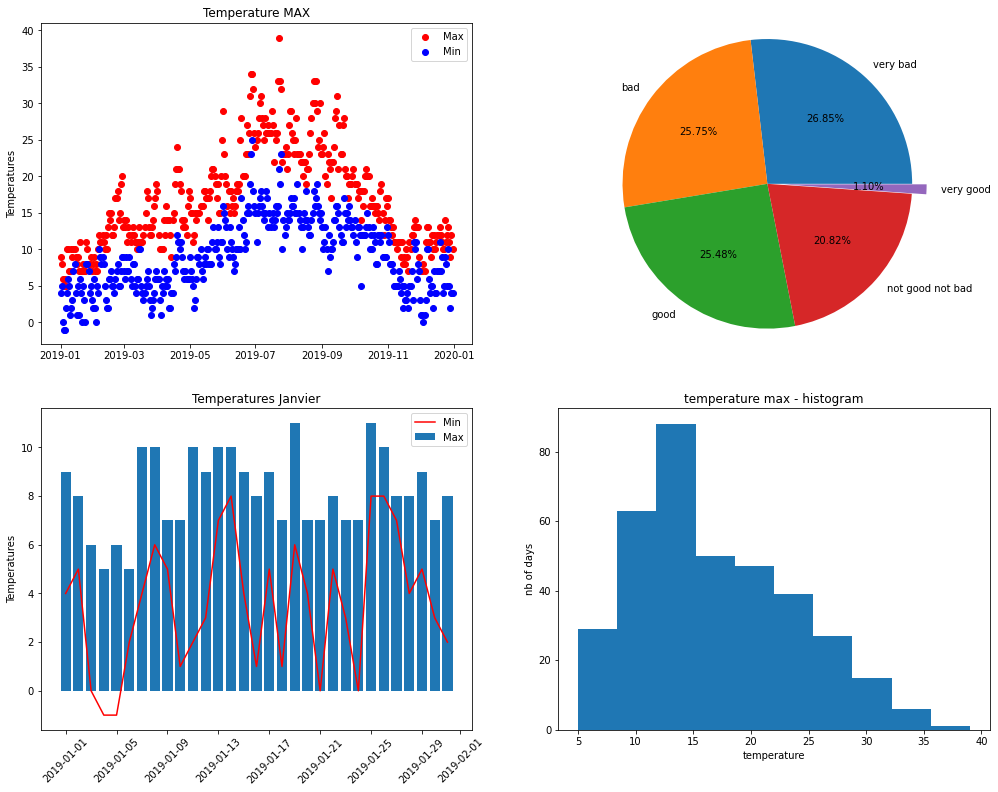

In [4]:
fig, ax = plt.subplots(figsize=(17, 13))

ax1 = plt.subplot(221)
ax1.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c = 'red')
ax1.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c = 'blue')
ax1.set_title('Temperature MAX')
ax1.set_ylabel('Temperatures')
ax1.legend(['Max', 'Min'], loc = 'upper right')

ax2 = plt.subplot(222)
ax2.pie(x = opinion_value_counts, explode=(0, 0, 0, 0, 0.1), labels=df_weather['OPINION'].value_counts().index.tolist(), autopct='%.2f%%')
ax2.axis('equal')

ax3 = plt.subplot(223)
ax3.bar(x = df_weather.iloc[:31]["DATE"], height = df_weather.iloc[:31]["MAX_TEMPERATURE_C"])
ax3.set_title('Temperatures Janvier')
ax3.plot(df_weather.iloc[:31]["DATE"], df_weather.iloc[:31]["MIN_TEMPERATURE_C"], c = "red")
ax3.legend(['Min', 'Max'], loc = 'upper right')
ax3.set_ylabel('Temperatures')

plt.xticks(rotation=45)

ax4 = plt.subplot(224)
ax4.hist(df_weather["MAX_TEMPERATURE_C"])
ax4.set_title('temperature max - histogram')
ax4.set_xlabel('temperature')
ax4.set_ylabel('nb of days')

plt.show()

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

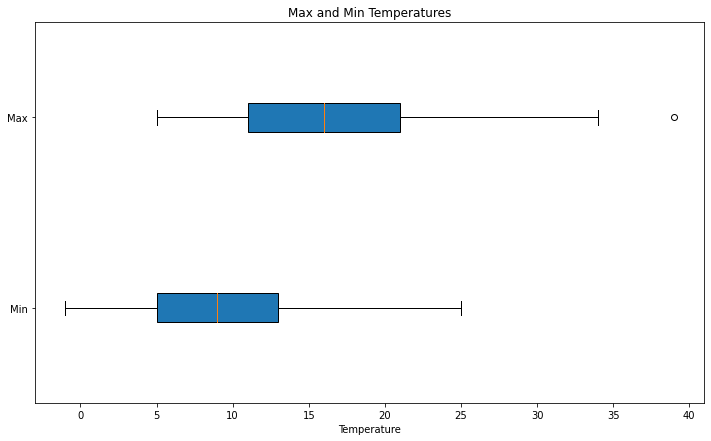

In [5]:
# Your code here :

fig, ax = plt.subplots(figsize=(12,7))

data = [df_weather["MIN_TEMPERATURE_C"], df_weather["MAX_TEMPERATURE_C"]]

ax = plt.subplot(111)
ax.boxplot(data, vert=False, labels=['Min', 'Max'], patch_artist=True)
ax.set_xlabel('Temperature')
ax.set_title('Max and Min Temperatures')

plt.show()


We can see that there is one outlier in the Max Temperatures series, but that value, about 39°C, is not something that we could consider impossible or even greatly surprising, so this outlier should not be removed from the analysis.

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

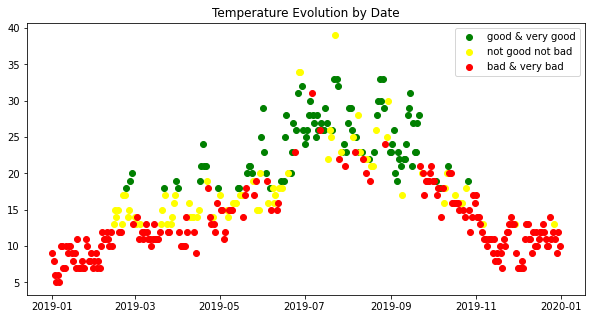

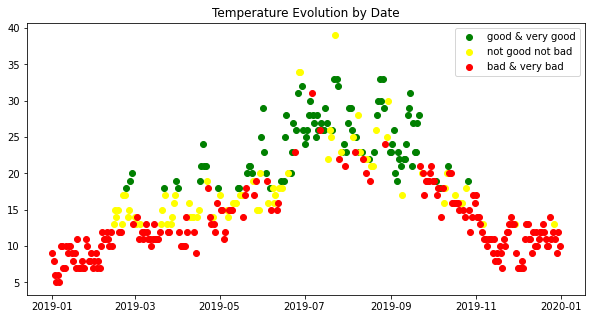

In [6]:
# It's your turn now :

green = df_weather[(df_weather['OPINION'] == 'very good') | (df_weather['OPINION'] == 'good')]
yellow = df_weather[df_weather['OPINION'] == 'not good not bad']
red = df_weather[(df_weather['OPINION'] == 'very bad') | (df_weather['OPINION'] == 'bad')]

ax = plt.figure(figsize=(10, 5))
ax_g = plt.scatter(x = green["DATE"], y = green["MAX_TEMPERATURE_C"], c='green', label='good & very good')
ax_y = plt.scatter(x = yellow["DATE"], y = yellow["MAX_TEMPERATURE_C"], c='yellow', label='not good not bad')
ax_y = plt.scatter(x = red["DATE"], y = red["MAX_TEMPERATURE_C"], c='red', label='bad & very bad')
ax = plt.legend()
ax = plt.title('Temperature Evolution by Date')

plt.show()